In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
files = [file for file in os.listdir('./Sales_data')]
dataset = pd.DataFrame()
for file in files:
    ds = pd.read_csv('./Sales_data/'+ file)
    dataset=pd.concat([dataset,ds])
    

In [4]:
dataset.index.nunique()

25117

In [5]:
dataset.reset_index(inplace=True,drop=True)

In [6]:
dataset.index.nunique()

186850

In [7]:
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
dataset=dataset.rename(columns={
    'Order ID':'orderid',
    'Product':'product',
    'Quantity Ordered':'quanity_ordered',
    'Price Each':'price_each',
    'Order Date':'order_date',
    'Purchase Address':'purchase_address'
})

In [9]:
dataset.dropna(inplace=True)

# Questions to answer:
- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?


In [10]:
dataset.head()

,orderid,product,quanity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
dataset=dataset[dataset['order_date'].str[0:2]!='Or']

In [12]:
dataset['order_date']=pd.to_datetime(dataset['order_date'],format='%m/%d/%y %H:%M')

In [13]:
dataset.dtypes

orderid                     object
product                     object
quanity_ordered             object
price_each                  object
order_date          datetime64[ns]
purchase_address            object
dtype: object

In [14]:
dataset['quanity_ordered']=dataset['quanity_ordered'].astype(int)

In [15]:
dataset['price_each']=dataset['price_each'].astype(float)

### - What was the best month for sales? How much was earned that month?

In [16]:
dataset['month']=dataset["order_date"].dt.month

In [17]:
dataset.head()

,orderid,product,quanity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [18]:
monthly_sales=dataset.groupby(dataset['order_date'].dt.to_period('M')).apply(lambda x :(x['price_each']*x["quanity_ordered"]).sum()).reset_index(name='revenue_that_month').sort_values(by='revenue_that_month',ascending=False)

In [19]:
monthly_sales.reset_index(inplace=True,drop=True)

In [20]:
monthly_sales

,order_date,revenue_that_month
0,2019-12,4613443.34
1,2019-10,3736726.88
2,2019-04,3390670.24
3,2019-11,3199603.20
4,2019-05,3152606.75
5,2019-03,2807100.38
6,2019-07,2647775.76
7,2019-06,2577802.26
8,2019-08,2244467.88
9,2019-02,2202022.42


<Axes: xlabel='order_date', ylabel='revenue_that_month'>

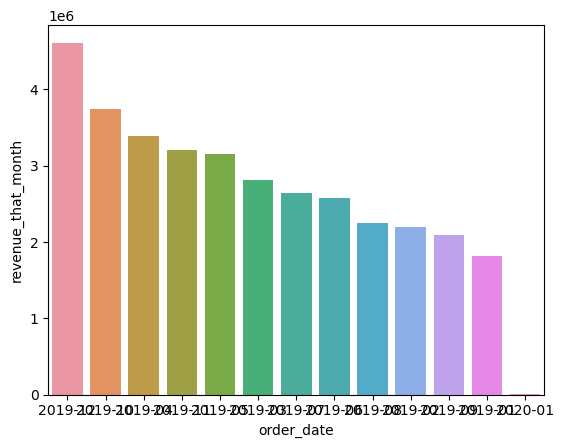

In [21]:
sns.barplot(monthly_sales,x='order_date',y='revenue_that_month')

### What city sold the most product?

In [22]:
dataset['city']=dataset['purchase_address'].str.split(',').str.get(1)

In [23]:
dataset.head()

,orderid,product,quanity_ordered,price_each,order_date,purchase_address,month,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [24]:
city_sales=dataset.groupby('city').apply(lambda x : (x['price_each']*x['quanity_ordered']).sum()).reset_index(name="total_sales")
city_sales.head()

,city,total_sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80


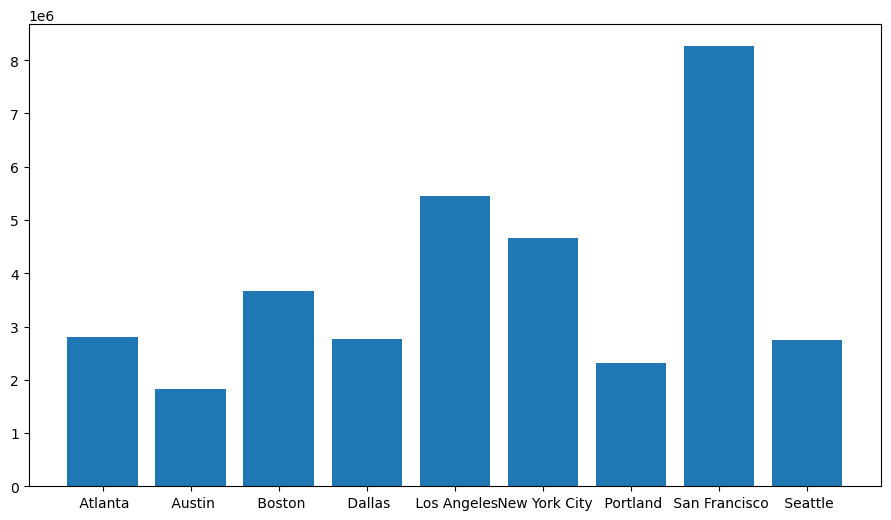

In [25]:
plt.figure(figsize=(11,6))
plt.bar(x=city_sales['city'],height=city_sales['total_sales'])
plt.show()

### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [38]:
ordersperhour=dataset.groupby(dataset['order_date'].dt.hour)['quanity_ordered'].sum().reset_index(name='orders_by_hour')
ordersperhour

,order_date,orders_by_hour
0,0,4428
1,1,2619
2,2,1398
3,3,928
4,4,937
5,5,1493
6,6,2810
7,7,4556
8,8,7002
9,9,9816


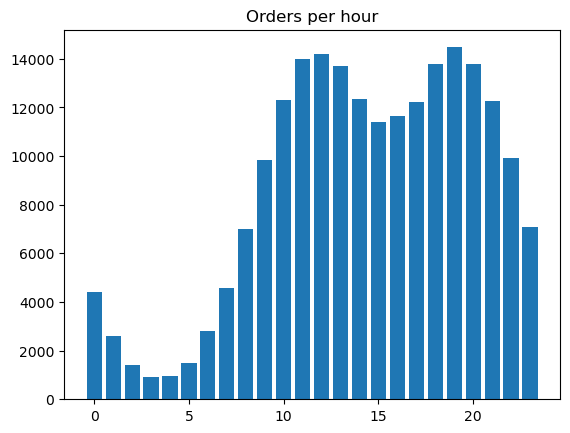

In [40]:
fig = plt.bar(x=ordersperhour['order_date'],height=ordersperhour['orders_by_hour'],)
plt.title('Orders per hour')
plt.show()

### - What products are most often sold together?

In [63]:
dataset.head()

,orderid,product,quanity_ordered,price_each,order_date,purchase_address,month,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [113]:
sold_together = dataset[dataset['orderid'].duplicated(keep=False)]

In [114]:
sold_together['grouped']= sold_together.groupby('orderid')['product'].transform(lambda x: ",".join(x))
sold_together.head()

C:\Users\yllar\AppData\Local\Temp\ipykernel_8176\1427250520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_together['grouped']= sold_together.groupby('orderid')['product'].transform(lambda x: ",".join(x))


,orderid,product,quanity_ordered,price_each,order_date,purchase_address,month,city,grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [115]:
sold_together=sold_together[['orderid','grouped']].drop_duplicates()
sold_together= sold_together.groupby("grouped")["grouped"].count().reset_index(name='total').sort_values(by='total',ascending=False)

In [120]:
sold_together.reset_index(drop=True,inplace=True)

In [122]:
sold_together.head()

,grouped,total
0,"iPhone,Lightning Charging Cable",882
1,"Google Phone,USB-C Charging Cable",856
2,"iPhone,Wired Headphones",361
3,"Vareebadd Phone,USB-C Charging Cable",312
4,"Google Phone,Wired Headphones",303


<Axes: xlabel='total', ylabel='grouped'>

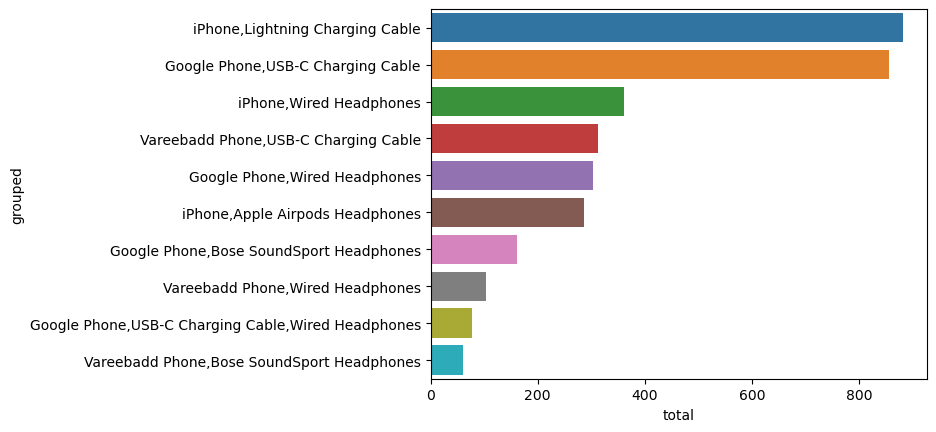

In [128]:
sns.barplot(data=sold_together.head(10),x='total',y='grouped',orient='h')

### - What product sold the most? Why do you think it sold the most?

In [41]:
dataset.head()

,orderid,product,quanity_ordered,price_each,order_date,purchase_address,month,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [133]:
most_sold_products=dataset.groupby('product')['quanity_ordered'].sum().sort_values(ascending=False).reset_index()
most_sold_products.head()

,product,quanity_ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557


<Axes: xlabel='quanity_ordered', ylabel='product'>

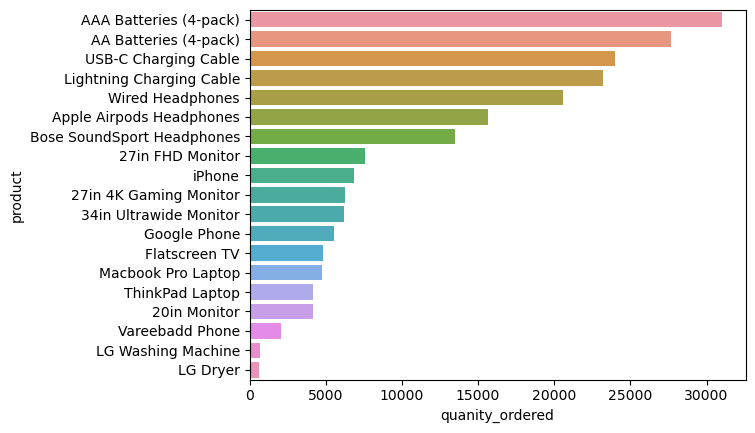

In [137]:
sns.barplot(data=most_sold_products,x='quanity_ordered',y='product')